In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
files = os.listdir(cwd)
files

['TAZ_analyze.ipynb',
 'taz_download.ipynb',
 'data',
 'export',
 'TAZ.csv',
 '.ipynb_checkpoints']

In [128]:
bigdf = pd.read_csv('./TAZ.csv')

In [129]:
bigdf.drop(columns=['Unnamed: 0'], inplace=True)

In [130]:
bigdf.tail()

,line_num,episode,speaker,lines
86798,322,The The Adventure Zone Zone: Experiments Post-...,Clint,"And if we don’t sell out, if we don’t sell ou..."
86799,323,The The Adventure Zone Zone: Experiments Post-...,Justin,"There it is, folks. You heard it here first. ..."
86800,324,The The Adventure Zone Zone: Experiments Post-...,Griffin,"Okay. That’s it. McElroyshows.com/tours, if y..."
86801,325,The The Adventure Zone Zone: Experiments Post-...,Justin,Bye y’all!
86802,326,The The Adventure Zone Zone: Experiments Post-...,[Deja Vu (TTAZZ Remix) plays],NaN


In [131]:
bigdf = bigdf[-bigdf.speaker.str.contains('\[|\{|\,|\.|\(|\"|and|Adventure|\&|TAZ|\*|1|/')]

In [132]:
bigdf.speaker = bigdf.speaker.str.strip()

In [138]:
filter_df = bigdf[bigdf.groupby('speaker')['speaker'].transform('count').ge(2)].groupby('speaker').count().sort_values(by='lines', ascending=False)

In [142]:
#filter out all of the lines from speakers that have < 2 lines
bigdf = bigdf[bigdf.groupby('speaker')['speaker'].transform('count').ge(2)]

In [139]:
filter_df.lines.to_csv('./line_count.csv')

In [155]:
bigdf = bigdf.sort_values(by=['episode', 'line_num'])

In [156]:
bigdf.fillna('', inplace=True)

In [159]:
nontrad = bigdf[-bigdf.episode.str.isnumeric()]

In [160]:
nontrad.groupby('episode').line_num.count().mean()

1110.0

In [161]:
normal = bigdf[bigdf.episode.str.isnumeric()]

In [162]:
nontrad = nontrad.append(bigdf[(bigdf.episode == '2017') | (bigdf.episode == '2016')])

In [163]:
normal = normal[-((normal.episode == '2016') | (normal.episode == '2017'))]

In [164]:
normal.episode = normal.episode.astype(int)

In [166]:
normal = normal.sort_values(by=['episode', 'line_num'])

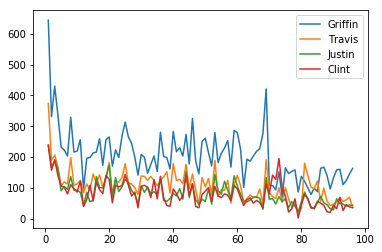

In [167]:
glines = normal[normal.speaker == 'Griffin'].groupby('episode').lines.count()
tlines = normal[normal.speaker == 'Travis'].groupby('episode').lines.count()
jlines = normal[normal.speaker == 'Justin'].groupby('episode').lines.count()
clines = normal[normal.speaker == 'Clint'].groupby('episode').lines.count()

plt.plot(glines)
plt.plot(tlines)
plt.plot(jlines)
plt.plot(clines)

plt.legend(['Griffin', 'Travis', 'Justin', 'Clint'])

In [168]:
sumlines = normal.groupby('episode').lines.count()

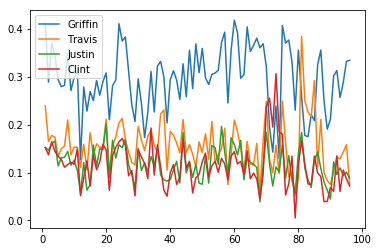

In [169]:
g_normal = glines/sumlines
t_normal = tlines/sumlines
j_normal = jlines/sumlines
c_normal = clines/sumlines

plt.plot(g_normal)
plt.plot(t_normal)
plt.plot(j_normal)
plt.plot(c_normal)

plt.legend(['Griffin', 'Travis', 'Justin', 'Clint'])

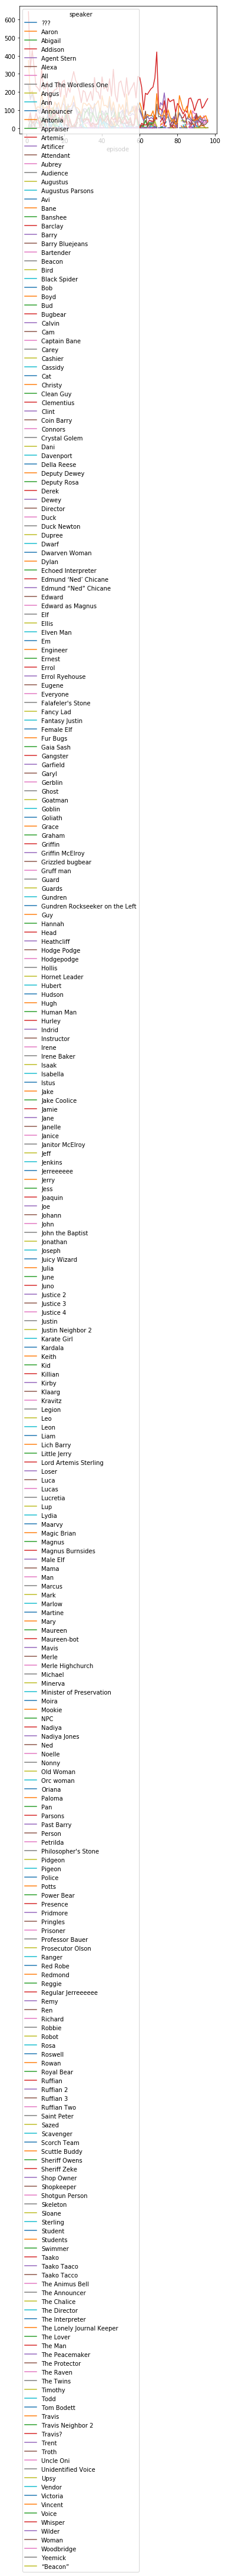

In [170]:
normal.groupby(['episode', 'speaker']).lines.count().unstack().plot(kind='line')

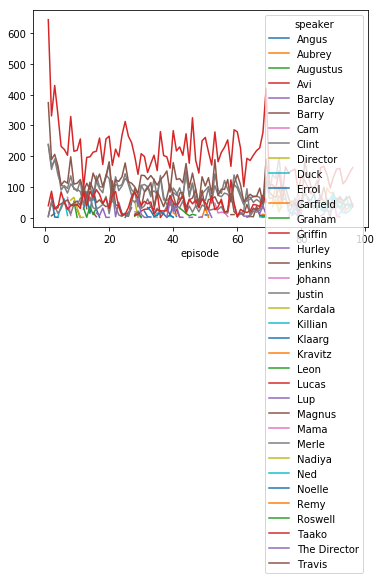

In [173]:
normal[normal.groupby('speaker')['speaker'].transform('count').ge(100)].groupby(['episode', 'speaker']).lines.count().unstack().plot(kind='line')

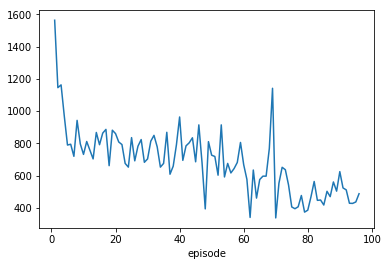

In [178]:
normal.groupby('episode').lines.count().plot(kind='line')

In [189]:
characters = normal[-normal.speaker.isin(['Griffin', 'Travis', 'Justin', 'Clint'])]

In [192]:
normal['character'] = True

In [196]:
normal.loc[normal.speaker.isin(['Griffin', 'Travis', 'Justin', 'Clint']),'character'] = False

In [197]:
normal.head()

,line_num,episode,speaker,lines,character
2,2,1,Magnus Burnsides,Travis McElroy,True
3,3,1,Merle Highchurch,Clint McElroy,True
4,4,1,Taako,Justin McElroy,True
7,7,1,Griffin,"Hey everybody, this is Griffin McElroy, your ...",False
8,8,1,Griffin,"So that is the plan, we are going to do this ...",False


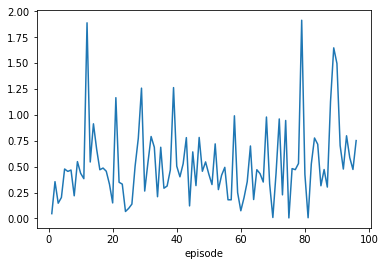

In [203]:
(normal[normal.character].groupby('episode').lines.count()/normal[-normal.character].groupby('episode').lines.count()).plot(kind='line')

In [214]:
normal.groupby(['episode'])

In [219]:
words = normal.groupby('speaker').lines.sum()

In [228]:
words = words.str.split()

Text(0.5,1,'Number of lines per character')

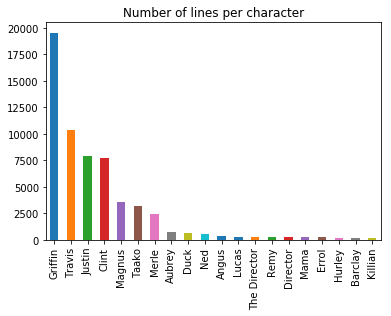

In [237]:
normal['speaker'].value_counts().head(20).plot(kind='bar')
plt.title('Number of lines per character')

In [253]:
top30 = normal.speaker.value_counts().head(30).index

In [291]:
top4 = normal.speaker.value_counts().head(4).index

In [292]:
top_lines = normal[normal.speaker.isin(top4)]

In [293]:
top_lines = top_lines.groupby('speaker').lines.sum()

In [294]:
top_lines.head()

speaker
Clint       I’ve never played in my entire life. I know, ...
Griffin     Hey everybody, this is Griffin McElroy, your ...
Justin      What about sponsors? Heheh. I played one time...
Travis      Yeah. Mhm. I call Katniss! Oh, is that like p...
Name: lines, dtype: object

In [267]:
import spacy

In [268]:
nlp = spacy.load('en_core_web_sm')

In [296]:
docdf = pd.Series([nlp(instance) for instance in top_lines[0]])

KeyboardInterrupt: 

In [278]:
docdf.head()

0    ( , Excuse, me, ,, sirs, ., My, grandpa, says,...
1    ( , Alright, ,, now, everybody, ?, I, want, yo...
dtype: object

In [286]:
for doc in docdf:
    for doc2 in docdf:
        print(doc.similarity(doc2))
    

1.0
0.9768490149821881
0.9909854704468272
0.9799564891003573
0.9913019537786188
0.9768490149821881
1.0
0.9785203309466268
0.9820673037869596
0.97964929294068
0.9909854704468272
0.9785203309466268
1.0
0.9747659943050961
0.9902976807234897
0.9799564891003573
0.9820673037869596
0.9747659943050961
1.0
0.9807199936181802
0.9913019537786188
0.97964929294068
0.9902976807234897
0.9807199936181802
1.0


In [287]:
top_lines[:5]

speaker
Angus        Excuse me, sirs. My grandpa says it’s rude to...
Aubrey       Alright, now everybody? I want you to listen ...
Augustus     Ah, pardon me, as much as it… mortifies me to...
Avi          After- after everything’s over, why don’t you...
Barclay      Well, alright, it was nice to meet ya, my nam...
Name: lines, dtype: object